<a href="https://colab.research.google.com/github/kai04/Amazon-SDE-Test-Series/blob/master/StopWords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import re, string
import spacy
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import re
from wordcloud import WordCloud, STOPWORDS
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from statistics import mean,median

Instructions for updating:
non-resource variables are not supported in the long term


**Read Data from Google Sheet**

In [ ]:
!pip install --upgrade -q gspread

import gspread
import pandas as pd
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
worksheet = gc.open("English_Grief_Bully_Dataset")
worksheet_list = worksheet.worksheets()
data = []
for sheet in worksheet_list:
  rows = sheet.get_all_records()
  data.extend(rows)
train_df = pd.DataFrame(data)

print(train_df.head())
print(train_df.describe())

                                            Sentence  Class
0  @USERNAME hi harry,\n\n how are you?\n \nit wi...  clean
1  hay will you follow me im still still looking ...  clean
2                                    cover ? <3 cx\n  clean
3             gabe favorited my tweet hgagfnsgasgf\n  clean
4                            @USERNAME go to sleep\n  clean
       Sentence  Class
count     35767  35767
unique    35071      3
top          \n  clean
freq         45  31029



**Exploration of Data**

In [ ]:
train_clean = train_df[train_df['Class'] =='clean']
train_grief = train_df[train_df['Class'] =='grief']
train_bully = train_df[train_df['Class'] =='bully']
print(train_bully.columns)


Index(['Sentence', 'Class'], dtype='object')


Analysis based on length

In [ ]:
train_clean['char_length'] = train_clean['Sentence'].apply(lambda x: len(str(x)))
train_grief['char_length'] = train_grief['Sentence'].apply(lambda x: len(str(x)))
train_bully['char_length'] = train_bully['Sentence'].apply(lambda x: len(str(x)))

In [ ]:
def plot_features(df,feature,plt_type):
  sns.set()
  if plt_type =="median":
    df[feature].hist(bins=range(int(median(df[feature]))))
  else:
    df[feature].hist()
  plt.show()
  print(df.describe())

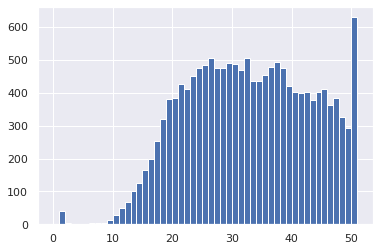

        char_length  upper_case_count
count  31029.000000      31029.000000
mean     102.331496          0.600761
std      260.879841          1.386320
min        1.000000          0.000000
25%       32.000000          0.000000
50%       52.000000          0.000000
75%       86.000000          1.000000
max     4191.000000         56.000000


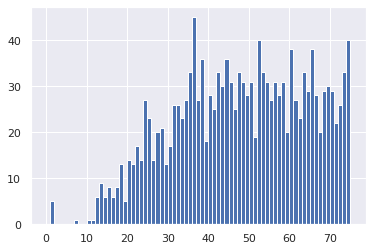

       char_length  upper_case_count
count  3178.000000       3178.000000
mean    119.856828          1.427627
std     164.729090          4.962683
min       1.000000          0.000000
25%      48.250000          0.000000
50%      76.000000          1.000000
75%     129.000000          2.000000
max    2996.000000        218.000000


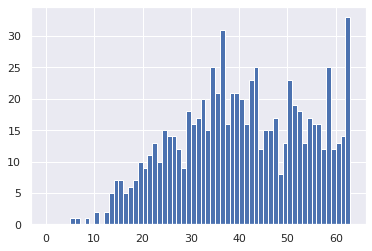

       char_length  upper_case_count
count  1560.000000       1560.000000
mean     80.121154          1.202564
std      72.919570          3.447023
min       5.000000          0.000000
25%      40.000000          0.000000
50%      64.000000          0.000000
75%     110.000000          1.000000
max    1755.000000         28.000000


In [ ]:
plot_features(train_clean,'char_length',"median")
plot_features(train_grief,'char_length',"median")
plot_features(train_bully,'char_length',"median")

Analysis Based on Upper case and special chars

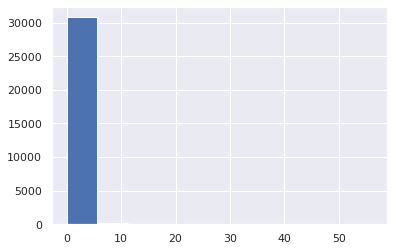

        char_length  upper_case_count
count  31029.000000      31029.000000
mean     102.331496          0.600761
std      260.879841          1.386320
min        1.000000          0.000000
25%       32.000000          0.000000
50%       52.000000          0.000000
75%       86.000000          1.000000
max     4191.000000         56.000000


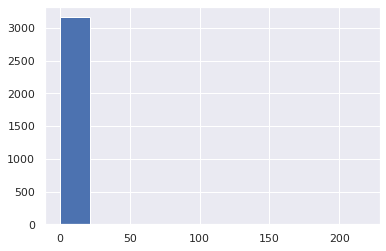

       char_length  upper_case_count
count  3178.000000       3178.000000
mean    119.856828          1.427627
std     164.729090          4.962683
min       1.000000          0.000000
25%      48.250000          0.000000
50%      76.000000          1.000000
75%     129.000000          2.000000
max    2996.000000        218.000000


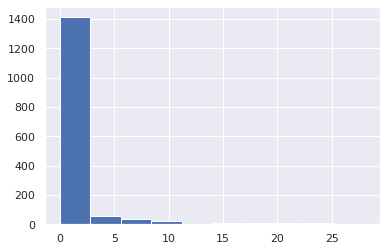

       char_length  upper_case_count
count  1560.000000       1560.000000
mean     80.121154          1.202564
std      72.919570          3.447023
min       5.000000          0.000000
25%      40.000000          0.000000
50%      64.000000          0.000000
75%     110.000000          1.000000
max    1755.000000         28.000000


In [ ]:
train_clean["upper_case_count"] = train_clean["Sentence"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
train_grief["upper_case_count"] = train_grief["Sentence"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
train_bully["upper_case_count"] = train_bully["Sentence"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
plot_features(train_clean,'upper_case_count',"normal")
plot_features(train_grief,'upper_case_count',"normal")
plot_features(train_bully,'upper_case_count',"normal")

Punctuation Symbols

In [ ]:
puncts = list(string.punctuation)
for x in ['.',',',';','-']:
    puncts.remove(x)
puncts

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 '/',
 ':',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

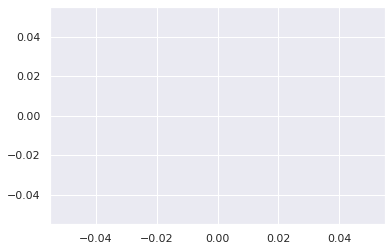

        char_length  upper_case_count   punct_count
count  31029.000000      31029.000000  31029.000000
mean     102.331496          0.600761      2.597087
std      260.879841          1.386320      8.261340
min        1.000000          0.000000      0.000000
25%       32.000000          0.000000      0.000000
50%       52.000000          0.000000      1.000000
75%       86.000000          1.000000      3.000000
max     4191.000000         56.000000    648.000000


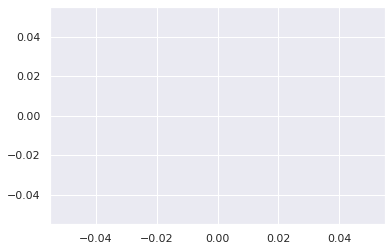

       char_length  upper_case_count  punct_count
count  3178.000000       3178.000000  3178.000000
mean    119.856828          1.427627     1.413782
std     164.729090          4.962683     3.246503
min       1.000000          0.000000     0.000000
25%      48.250000          0.000000     0.000000
50%      76.000000          1.000000     0.000000
75%     129.000000          2.000000     2.000000
max    2996.000000        218.000000    72.000000


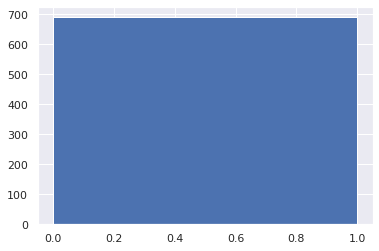

       char_length  upper_case_count  punct_count
count  1560.000000       1560.000000  1560.000000
mean     80.121154          1.202564     2.410897
std      72.919570          3.447023     3.444196
min       5.000000          0.000000     0.000000
25%      40.000000          0.000000     1.000000
50%      64.000000          0.000000     2.000000
75%     110.000000          1.000000     3.000000
max    1755.000000         28.000000    98.000000


In [ ]:
train_clean["punct_count"] = train_clean["Sentence"].apply(lambda x: len([c for c in str(x) if c in puncts ]))
train_grief["punct_count"] = train_grief["Sentence"].apply(lambda x: len([c for c in str(x) if c in puncts ]))
train_bully["punct_count"] = train_bully["Sentence"].apply(lambda x: len([c for c in str(x) if c in puncts ]))
plot_features(train_clean,'punct_count',"median")
plot_features(train_grief,'punct_count',"median")
plot_features(train_bully,'punct_count',"median")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Stop Words**

In [ ]:
from nltk.corpus import stopwords
import nltk
import spacy
from spacy.lang.en import English
nltk.download('stopwords')
nltk_sw = stopwords.words('english')

spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

print(f'Number of stop words: {len(spacy_stopwords)}')
print(f'First ten stop words: {list(spacy_stopwords)[:20]}')
nltk_exclusive = set(nltk_sw).difference(set(spacy_stopwords))
spacy_exclusive = set(spacy_stopwords).difference(set(nltk_sw))
print(nltk_exclusive)
print(spacy_exclusive)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Number of stop words: 326
First ten stop words: ['between', 'himself', 'none', 'due', 'as', 'show', "'ll", 'together', 'anyhow', 'against', 'eleven', 'under', 'why', 'them', 'until', 'ca', 'yourselves', 'all', 'so', 're']
{'shan', "wouldn't", 'weren', "mustn't", 'theirs', 'd', "mightn't", "you've", 'isn', 'having', "won't", 't', 'o', 'wouldn', "aren't", "weren't", 'couldn', 'doesn', "doesn't", 'needn', "isn't", "don't", "wasn't", 'ma', 'mustn', "you're", 'wasn', "haven't", 'hasn', "she's", "needn't", 'mightn', "hasn't", 'aren', "hadn't", 'haven', 'y', "it's", 'm', 'won', "you'll", 'didn', "didn't", "should've", 've', "you'd", "couldn't", "shouldn't", "that'll", 's', 'shouldn', 'hadn', 'ain', 'don', 'll', "shan't"}
{'none', 'show', 'due', "'ll", 'together', 'anyhow', 'eleven', 'ca', 'neither', 'however', 'quite', 'almost', 'along', 'least', '’m', 'former', 'mine', 'back', 'most

In [ ]:
print(nltk_sw)
print(spacy_stopwords)
STOPWORDS = spacy_stopwords
add_stopword = ['username']
STOPWORDS.union(set(add_stopword))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

**Text Cleaning**

In [ ]:
def set_string(text):
    text = text.lower()
    text = text.replace('\\n',' ')
    try:
        text = text.decode('utf-8', 'strict').encode('ascii', 'ignore')
    except Exception as err:
        text = ''.join(i for i in text if ord(i)<128)
    return text
  
def reduce_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

def clean_numbers(x):
    #print("check:",type(x))
    x = re.sub('[0-9]{5,}', '',str(x))
    x = re.sub('[0-9]{4}', '', str(x))
    x = re.sub('[0-9]{3}', '', str(x))
    x = re.sub('[0-9]{2}', '', str(x))
    return x

def replace_username_url(text):
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)
    text = re.sub('((www\.[^\s]+)|(http?://[^\s]+))', '', text)
    text = re.sub('@[^\s]+','@USERNAME', text)
    text = re.sub('[\s]+', ' ', text)
    return text

def replace_space(text):
    if text.find(r'\t') >= 0:
        text = ' '.join(text.split(r'\t'))
    if text.find(r'\n') >= 0:
        text = ' '.join(text.split(r'\n'))
    if text.find(r'\"') >= 0:
        text = '"'.join(text.split(r'\"'))
    #re.sub(' +', ' ', text)
    text = " ".join(text.split())
    return text.strip()

#contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have","motherfucking":"mother fucking","lmfaoo":"laughing my fucking ass of","dickhead":"dick head","meangirlsappreciationday":"mean girls appreciation day","bluewhalechallenge":"blue whale challenge","omgg":"oh my god","ifmydickwasamovie":"if my dick was a movie","halfnakedandalmostfamous":"half naked and almost famous","gunstuff":"gun stuff" }
contraction_mapping = {"she'll": 'she will', "shouldn't've": 'should not have', "she'll've": 'she will have', "don't": 'do not', "should've": 'should have', "oughtn't've": 'ought not have', 'gf': 'girlfriend', 'stfu': 'shut the fuck up', "won't": 'will not', 'ootd': 'outfit of the day ', "who'll": 'who will', "who'll've": 'who will have', 'bff': 'best friend forever', "he's": 'he is', "when's": 'when is', "we've": 'we have', "he'd": 'he would', '4eva': 'forever', "y'all're": 'you all are', '2nte': 'tonight', "how'd'y": 'how do you', "shan't've": 'shall not have', 'afaiui': 'as far as i understand it', "haven't": 'have not', 'faq': 'frequently asked questions', 'tbh': 'to be honest', "oughtn't": 'ought not', "I'd": 'I would', "you've": 'you have', 'fab': 'fabulous', "I'm": 'I am', "she'd've": 'she would have', "we'll": 'we will', 'gud': 'good ', "mayn't": 'may not', 'aeap': 'as early as possible', "wasn't": 'was not', 'bae': 'babe', "could've": 'could have', 'omgg': 'oh my god', "what've": 'what have', "mustn't": 'must not', "isn't": 'is not', "it'll": 'it will', "y'all": 'you all', "why's": 'why is', "you'd": 'you would', "i'll": 'i will', "they've": 'they have', 'b4': 'before', 'dickhead': 'dick head', '10x': 'thanks', "sha'n't": 'shall not', "we'd": 'we would', "o'clock": 'of the clock', "to've": 'to have', '10q': 'thank you', "this's": 'this is', "shan't": 'shall not', 'acpt': 'accept', "y'all'd've": 'you all would have', "there'd": 'there would', '2m2h': 'too much to handle', "needn't": 'need not', 'asap': 'as soon as possible', "wouldn't've": 'would not have', "there's": 'there is', "shouldn't": 'should not', "they'll": 'they will', "needn't've": 'need not have', 'bf': 'boyfriend', "mightn't": 'might not', 'bc': 'because', "so've": 'so have', "what'll": 'what will', "mightn't've": 'might not have', "hadn't": 'had not', "y'all'd": 'you all would', 'asl': 'age sex location', "where's": 'where is', "I'll've": 'I will have', 'ack': 'acknowledge', 'hbd': 'happy birth day', "wouldn't": 'would not', '2mor': 'tomorrow', "i'd": 'i would', 'idk': 'i dont know', "would've": 'would have', "i'm": 'i am', "that'd've": 'that would have', "we'd've": 'we would have', 'tysm': 'thank you so much', 'afap': 'as far as possible', 'motherfucking': 'mother fucking', 'h8': 'hate', 'halfnakedandalmostfamous': 'half naked and almost famous', 'afaik': 'as far as i know', 'afaic': 'as far as i concern', '1dr': 'i wonder', "couldn't": 'could not', "how'll": 'how will', 'ifmydickwasamovie': 'if my dick was a movie', "doesn't": 'does not', "might've": 'might have', "how's": 'how is', "I've": 'I have', "it's": 'it is', "i'll've": 'i will have', "ma'am": 'madam', 'lol': 'laugh out loud', "how'd": 'how did', 'gnite': 'good night', "we're": 'we are', "I'd've": 'I would have', "it'd": 'it would', "what're": 'what are', "i've": 'i have', 'f**k': 'fuck', "what's": 'what is', '2n8': 'tonight', "ain't": 'is not', 'meangirlsappreciationday': 'mean girls appreciation day', '6y': "sexy", "i'd've": 'i would have', '4ao': 'for adults only', "here's": 'here is', "I'll": 'I will', "they're": 'they are', 'aaf': 'as a matter of fact', "you'd've": 'you would have', 'lmao': 'laughing my ass off', "they'll've": 'they will have', "mustn't've": 'must not have', "it'll've": 'it will have', "hasn't": 'has not', "that'd": 'that would', "won't've": 'will not have', 'b-day': 'birthday', "so's": 'so as', "you'll've": 'you will have', "there'd've": 'there would have', "y'all've": 'you all have', "didn't": 'did not', "she'd": 'she would', 'dafuq': 'what the fuck', "where've": 'where have', "they'd've": 'they would have', "why've": 'why have', "it'd've": 'it would have', "aren't": 'are not', 'acdnt': 'accident', 'b/c': 'because', "you're": 'you are', "weren't": 'were not', "who've": 'who have', "who's": 'who is', 'hawt': 'hot sexy', "where'd": 'where did', 'bday': 'birthday', 'bluewhalechallenge': 'blue whale challenge', 'lmfaoo': 'laughing my fucking ass of', "let's": 'let us', "what'll've": 'what will have', "'cause": 'because', "must've": 'must have', 'fck': 'fuck', "he'll": 'he will', "they'd": 'they would', 'kk': 'okay', "when've": 'when have', "we'll've": 'we will have', 'gr8': 'great', "you'll": 'you will', 'gunstuff': 'gun stuff', "can't": 'cannot', '1ce': 'once', "will've": 'will have', "she's": 'she is', "that's": 'that is'}
replaceList  = {'your[\s]*self':'yourself','my[\s]*self':'myself','her[\s]*self':'herself',\
                             '( ur )':' your ',' any[\s]*more ':' anymore ','(k1ll)':'kill','him[\s]*self':'himself',\
                             '( im )':' i am ','(suiside)':'suicide','sui[\s]*side':'suicide','(s u i c i d e)':'suicide',\
                             '(suisidal)':'suicidal','( urself )':' yourself ','(comit)':'commit','(comiting)':'commiting',\
                             'him[\s]*self':'himself','(yourseld)':'yourself','(yourselg)':'yourself','sui[\s]*cide':'suicide'}
 
 
def substitue_regex_replacement(text):
  for ph in replaceList.keys():
    regph = re.compile(r'{}'.format(ph))
    text = re.sub(regph,replaceList[ph],str(text))
  return text


def clean_contractions(text):
    mapping = contraction_mapping
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

punct = "/'?!,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
def remove_punct(text):
  for i in punct : 
    text = text.replace(i, '')
  return text 

In [ ]:
train_clean['Sentence'] = train_clean['Sentence'].progress_apply(lambda x: replace_username_url(x))
train_clean['Sentence'] = train_clean['Sentence'].progress_apply(lambda x: set_string(x))
train_clean['Sentence'] = train_clean['Sentence'].progress_apply(lambda x: clean_numbers(x))
train_clean['Sentence'] = train_clean['Sentence'].progress_apply(lambda x: replace_space(x))
train_clean['Sentence'] = train_clean['Sentence'].progress_apply(lambda x: substitue_regex_replacement(x))
train_clean['Sentence'] = train_clean['Sentence'].progress_apply(lambda x: clean_contractions(x))
train_clean['Sentence'] = train_clean['Sentence'].progress_apply(lambda x: reduce_lengthening(x))
train_clean['Sentence'] = train_clean['Sentence'].progress_apply(lambda x: remove_punct(x))

train_grief['Sentence'] = train_grief['Sentence'].progress_apply(lambda x: replace_username_url(x))
train_grief['Sentence'] = train_grief['Sentence'].progress_apply(lambda x: set_string(x))
train_grief['Sentence'] = train_grief['Sentence'].progress_apply(lambda x: clean_numbers(x))
train_grief['Sentence'] = train_grief['Sentence'].progress_apply(lambda x: replace_space(x))
train_grief['Sentence'] = train_grief['Sentence'].progress_apply(lambda x: substitue_regex_replacement(x))
train_grief['Sentence'] = train_grief['Sentence'].progress_apply(lambda x: clean_contractions(x))
train_grief['Sentence'] = train_grief['Sentence'].progress_apply(lambda x: reduce_lengthening(x))
train_grief['Sentence'] = train_grief['Sentence'].progress_apply(lambda x: remove_punct(x))

train_bully['Sentence'] = train_bully['Sentence'].progress_apply(lambda x: replace_username_url(x))
train_bully['Sentence'] = train_bully['Sentence'].progress_apply(lambda x: set_string(x))
train_bully['Sentence'] = train_bully['Sentence'].progress_apply(lambda x: clean_numbers(x))
train_bully['Sentence'] = train_bully['Sentence'].progress_apply(lambda x: replace_space(x))
train_bully['Sentence'] = train_bully['Sentence'].progress_apply(lambda x: substitue_regex_replacement(x))
train_bully['Sentence'] = train_bully['Sentence'].progress_apply(lambda x: clean_contractions(x))
train_bully['Sentence'] = train_bully['Sentence'].progress_apply(lambda x: reduce_lengthening(x))
train_bully['Sentence'] = train_bully['Sentence'].progress_apply(lambda x: remove_punct(x))


100%|██████████| 1560/1560 [00:00<00:00, 67805.00it/s]


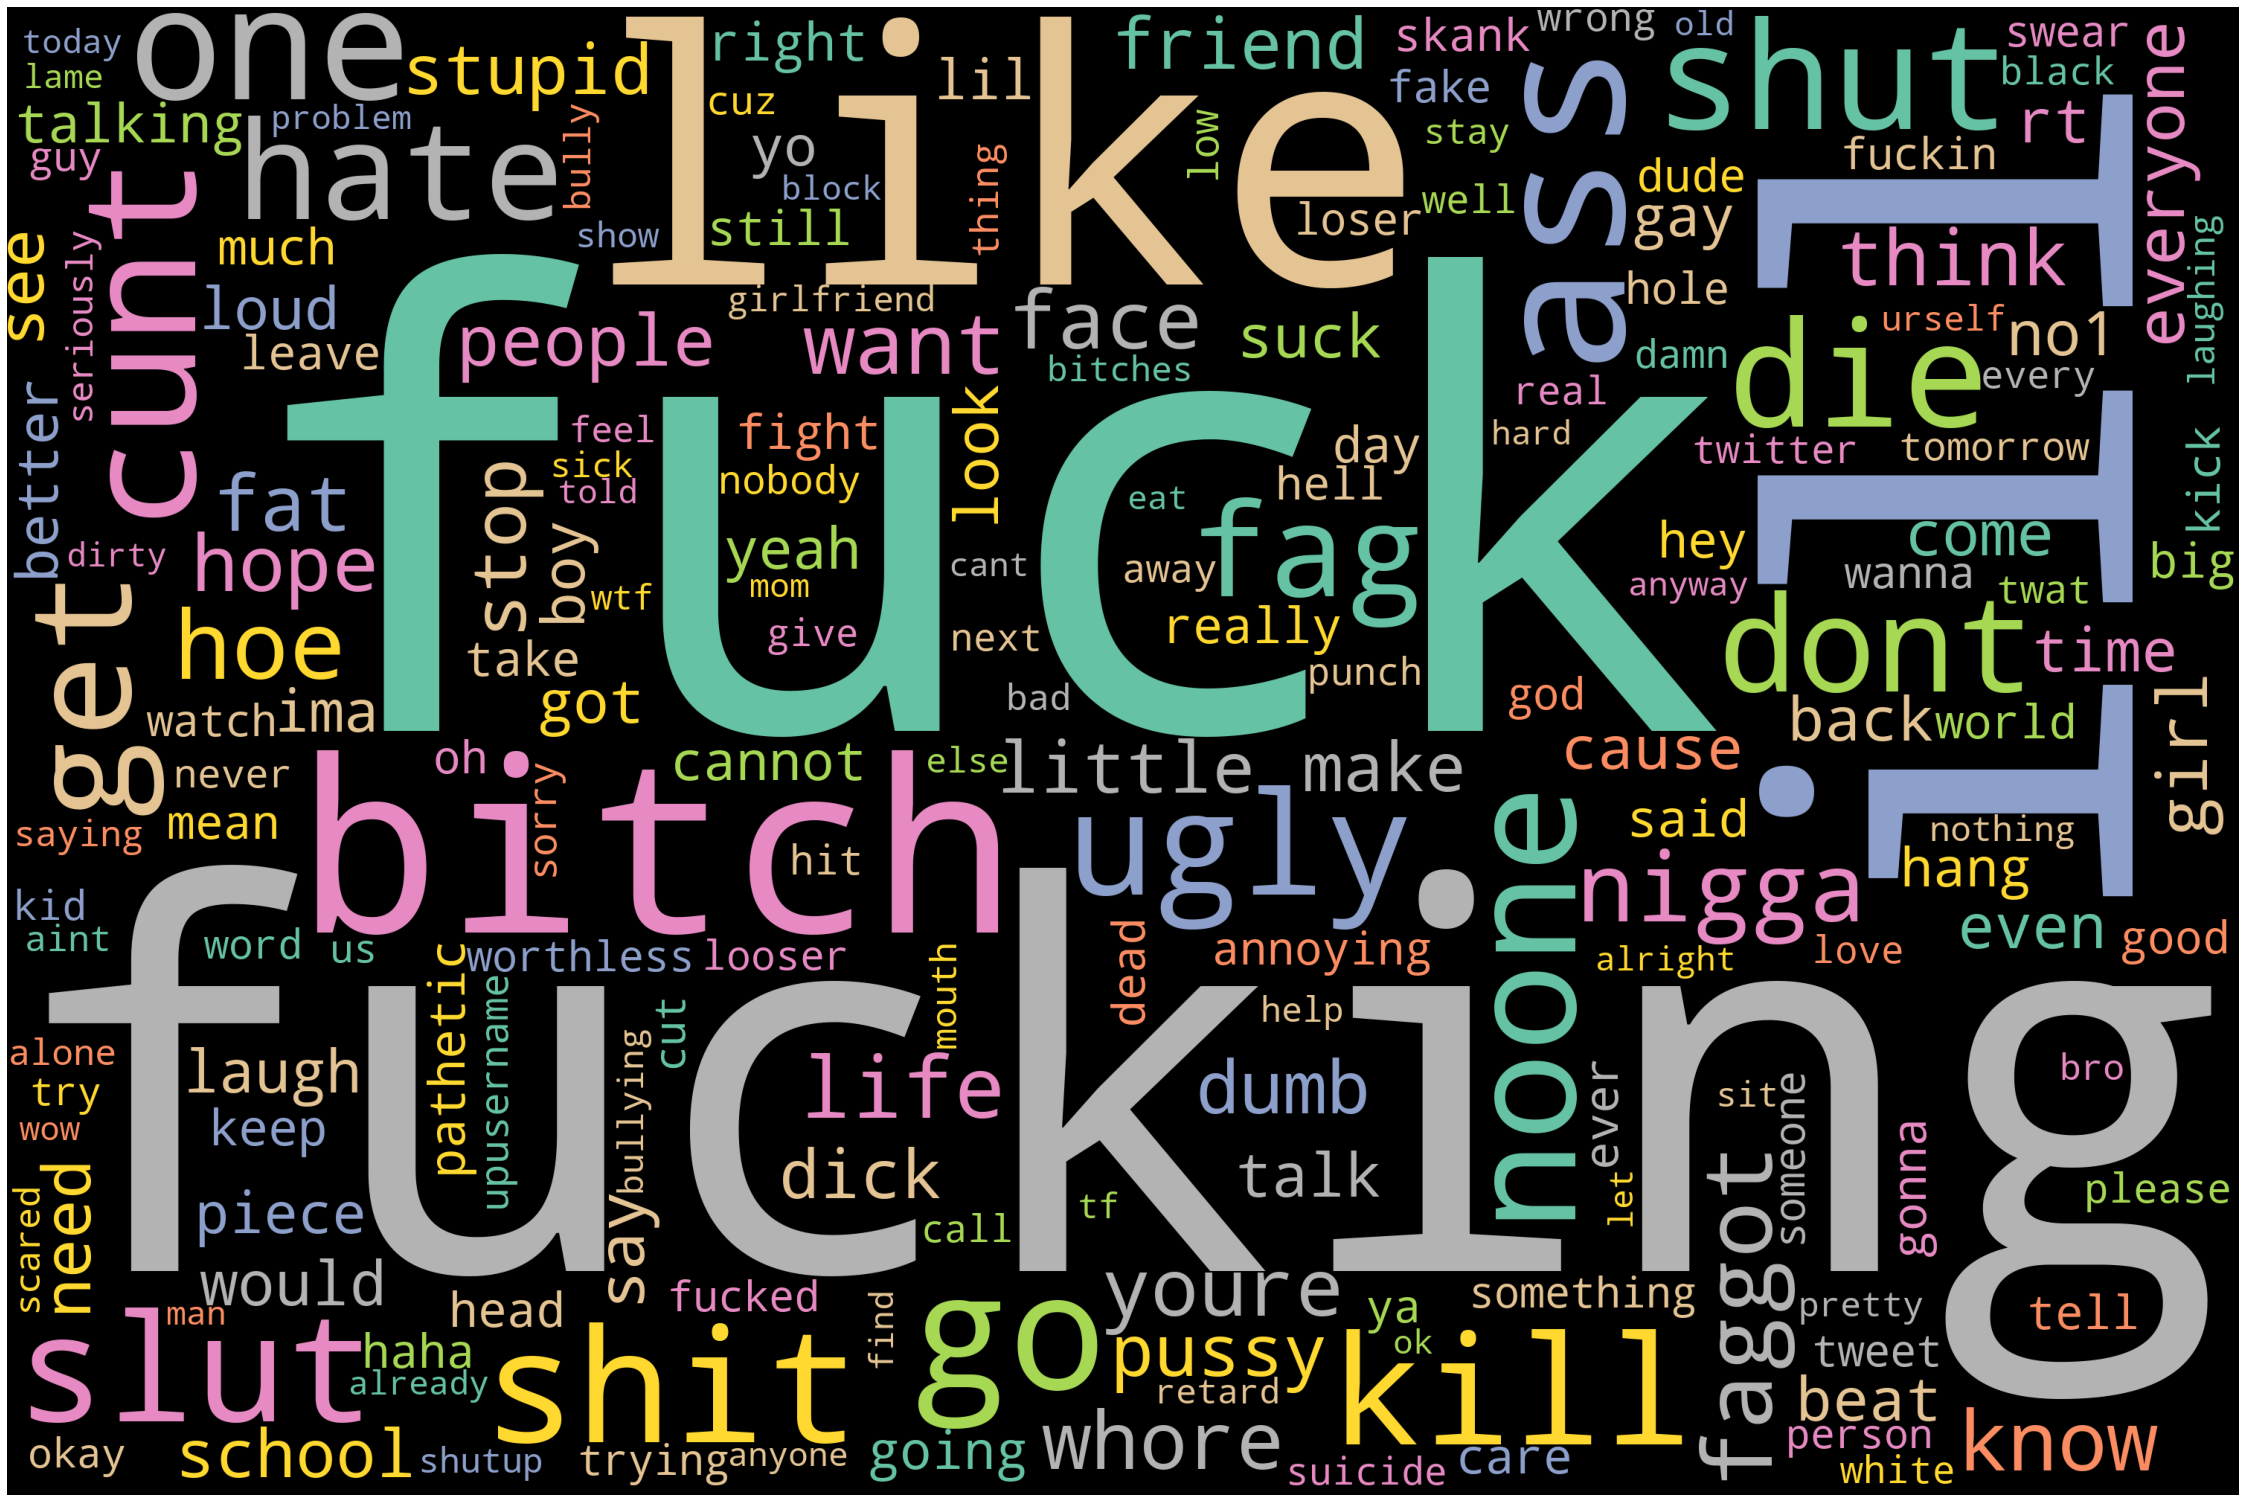

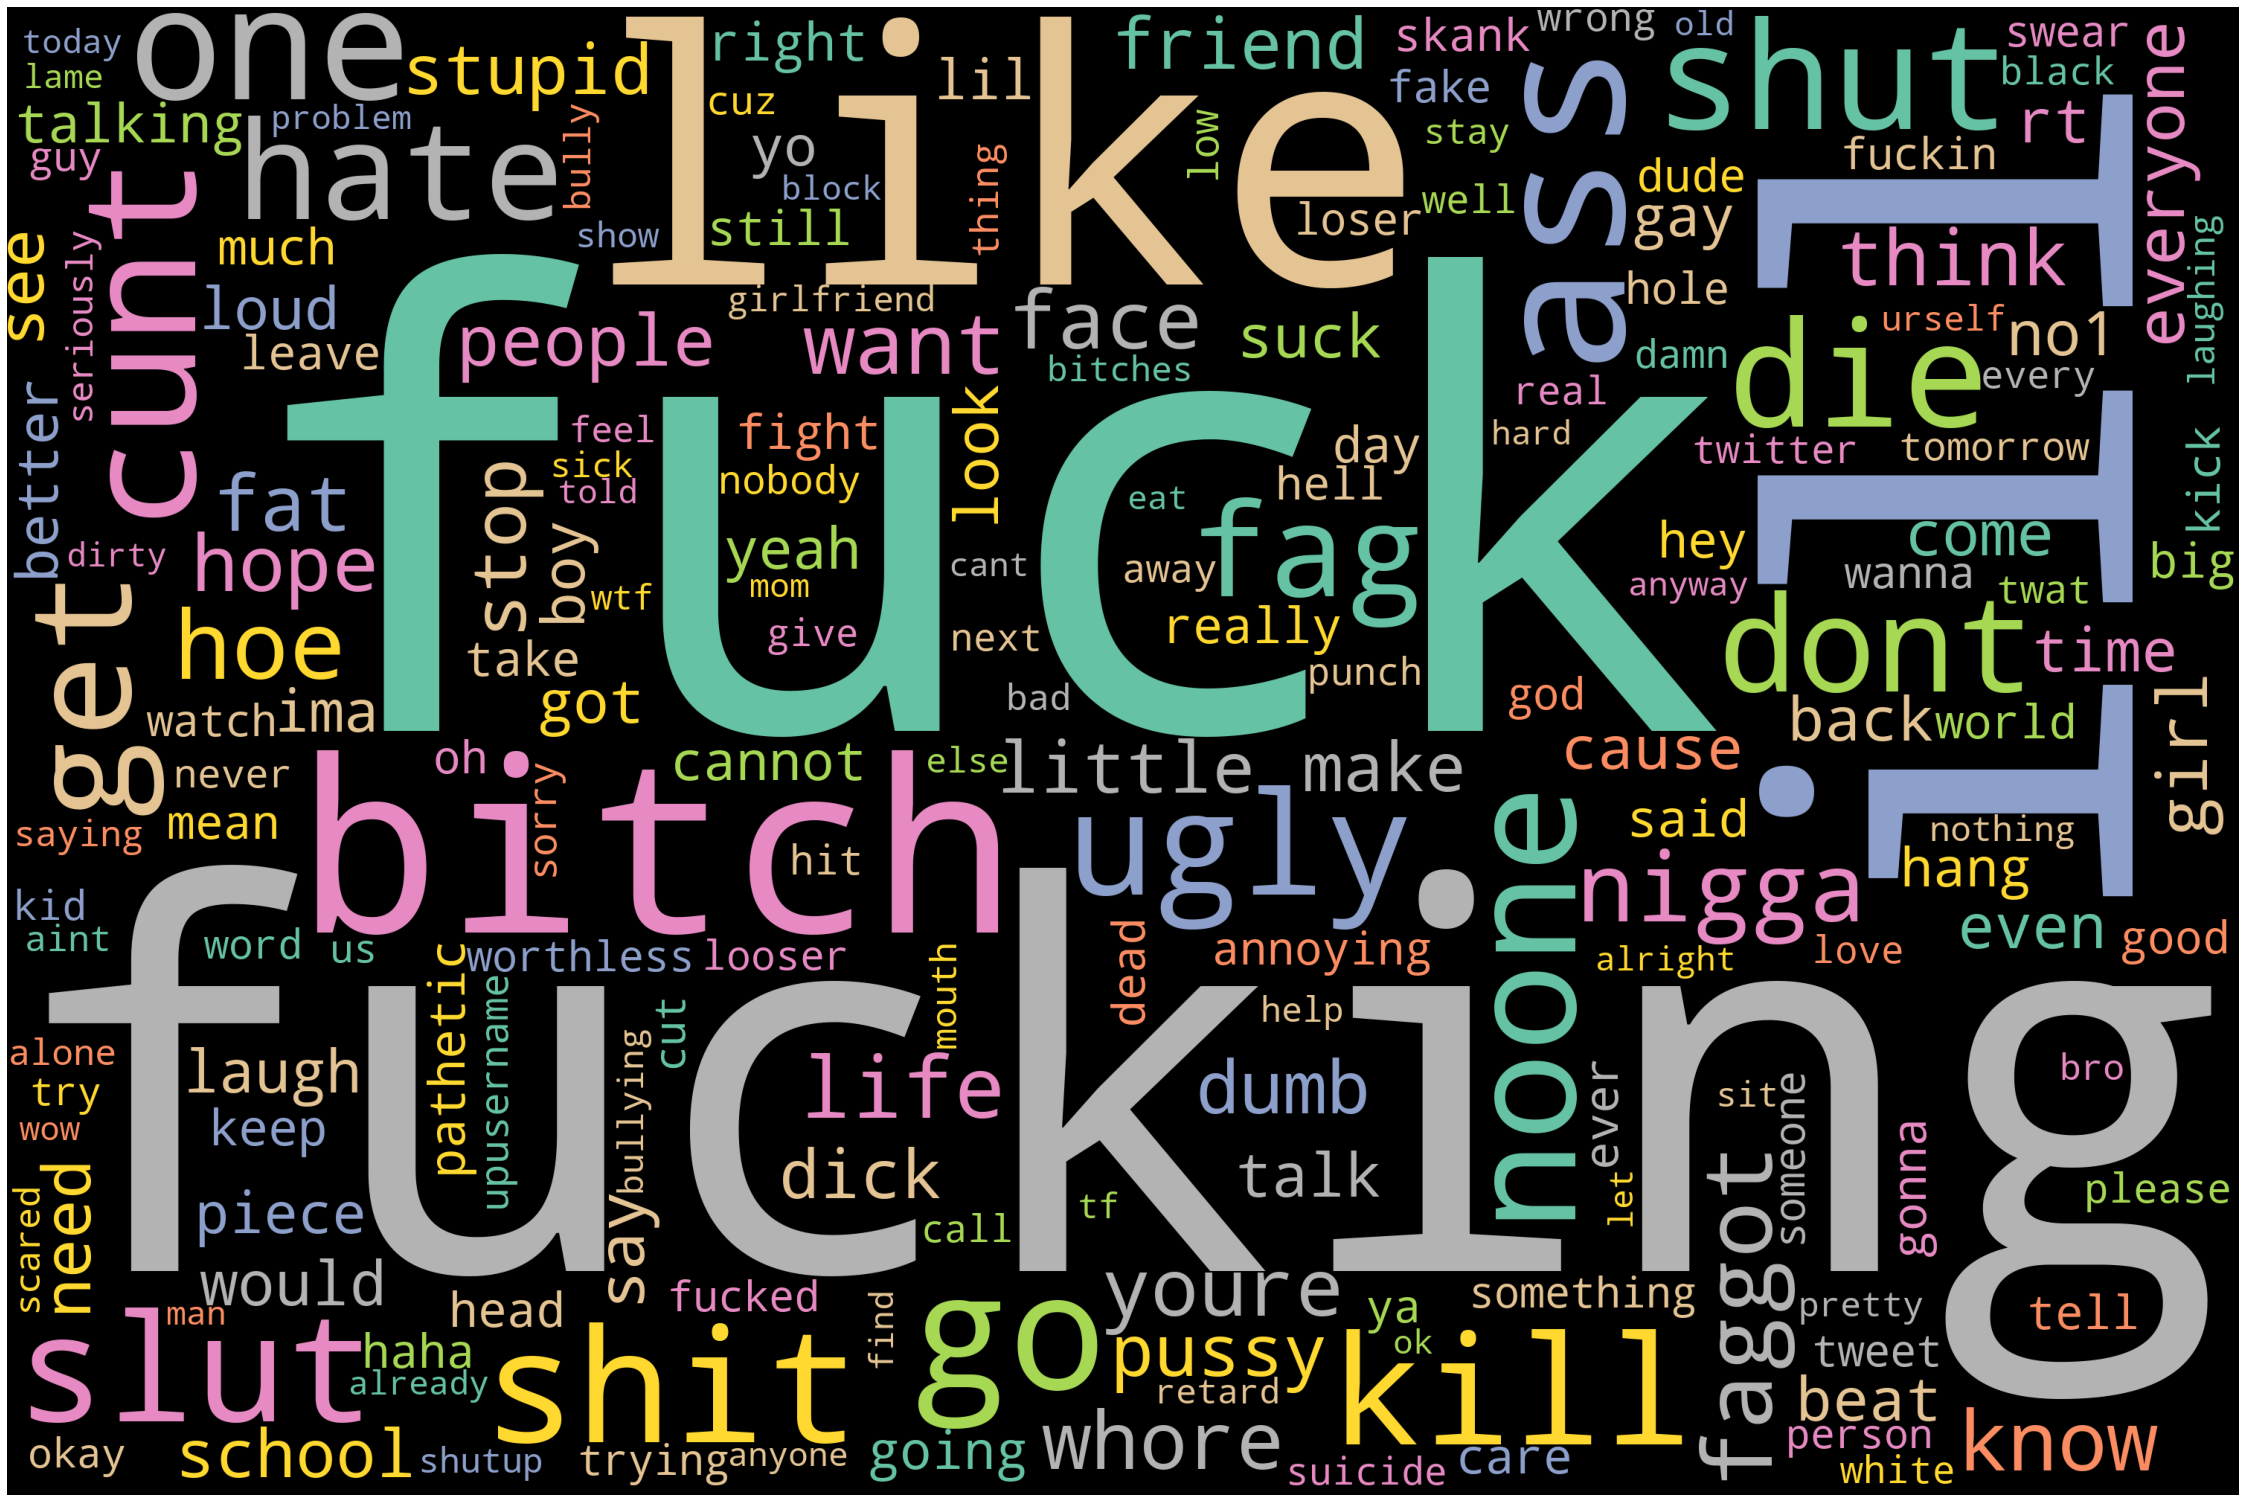

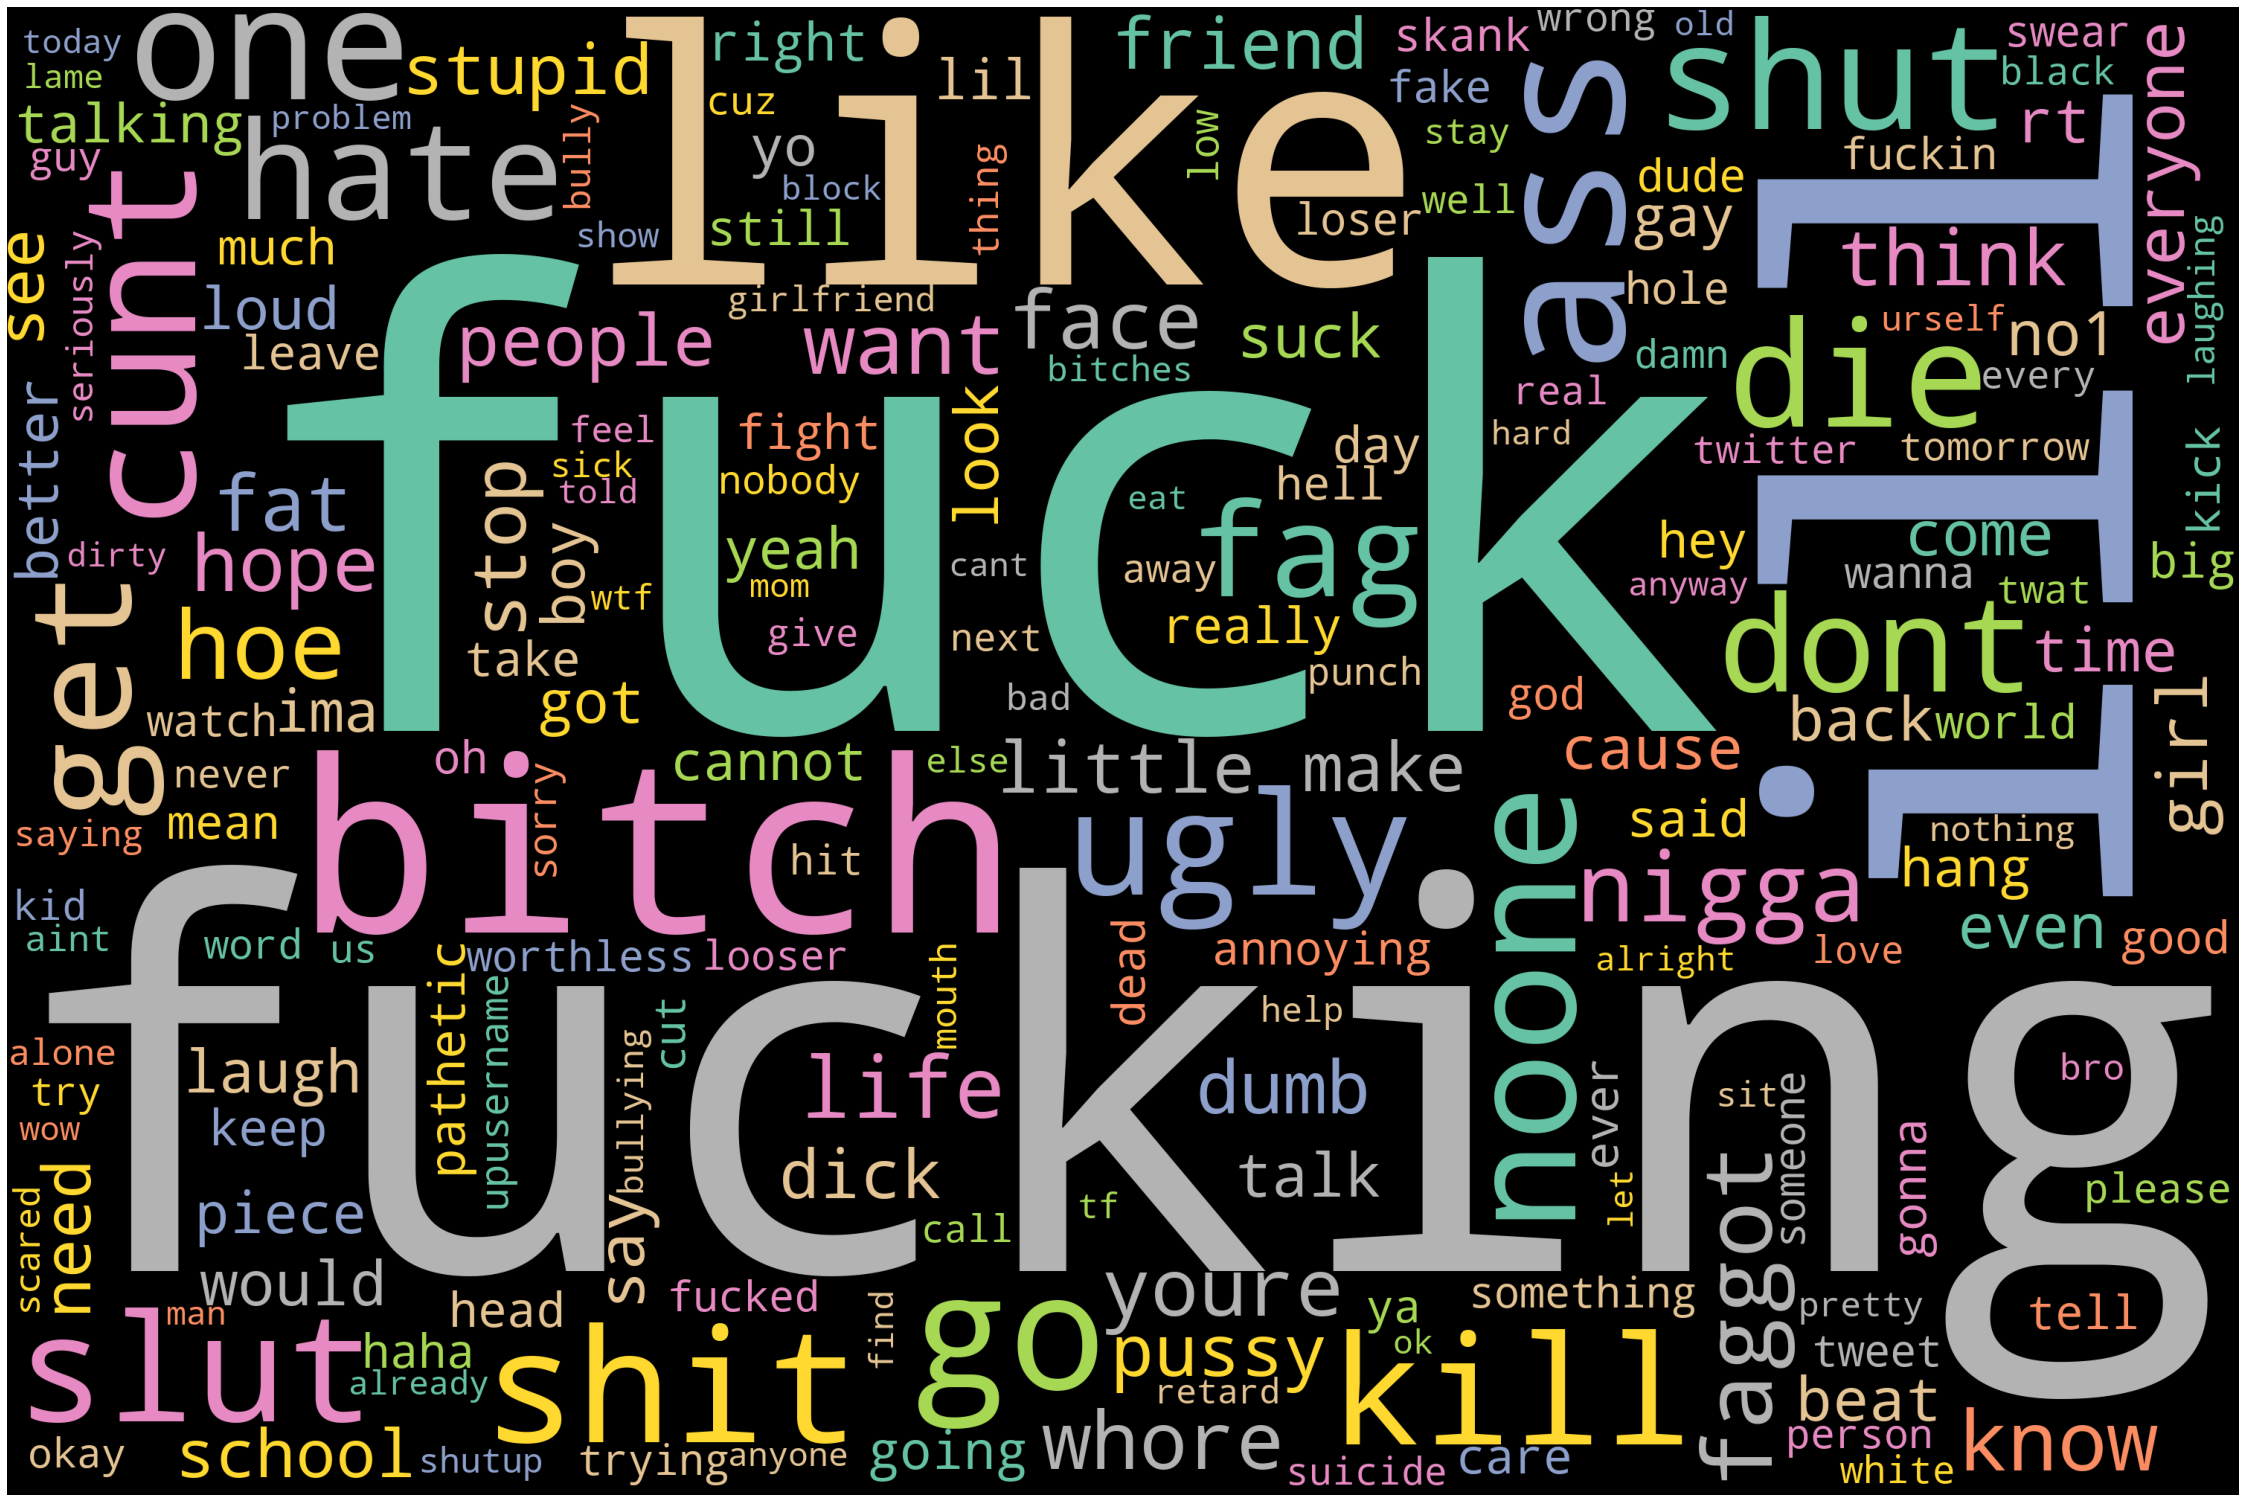

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

sentences = train_clean['Sentence'].values
all_sentences_clean = " ".join(sentences)
sentences = train_grief['Sentence'].values
all_sentences_grief = " ".join(sentences)
sentences = train_bully['Sentence'].values
all_sentences_bully = " ".join(sentences)

# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS)

clean_wc = wordcloud.generate(all_sentences_clean)
grief_wc = wordcloud.generate(all_sentences_grief)
bully_wc = wordcloud.generate(all_sentences_bully)
# Plot
plot_cloud(clean_wc)
plot_cloud(grief_wc)
plot_cloud(bully_wc)

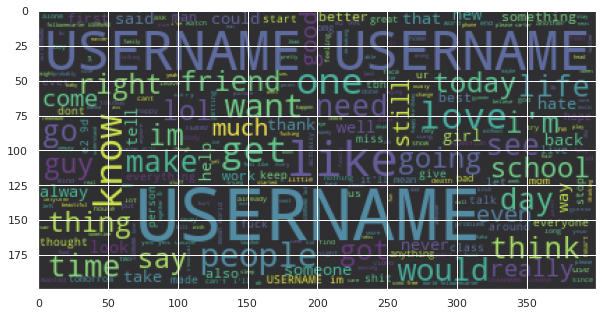

In [ ]:
#word cloud for clean data, i have taken most frequest 500 words
from wordcloud import WordCloud
text_data = train_clean.Sentence.values
wc = WordCloud(stopwords = STOPWORDS,max_words = 500)
wc.generate(" ".join(text_data))
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(colormap='viridis',random_state = 41),alpha = .80)
plt.show()

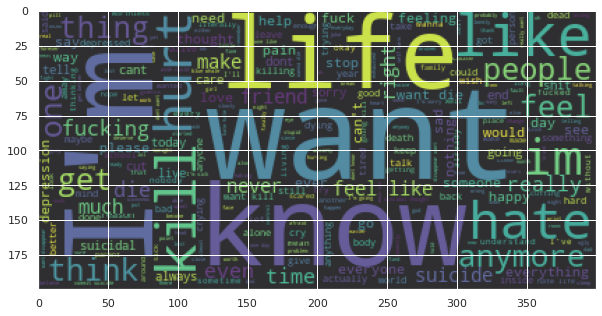

In [ ]:
text_data = train_grief.Sentence.values
wc = WordCloud(stopwords = STOPWORDS,max_words = 500)
wc.generate(" ".join(text_data))
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(colormap='viridis',random_state = 41),alpha = .80)
plt.show()

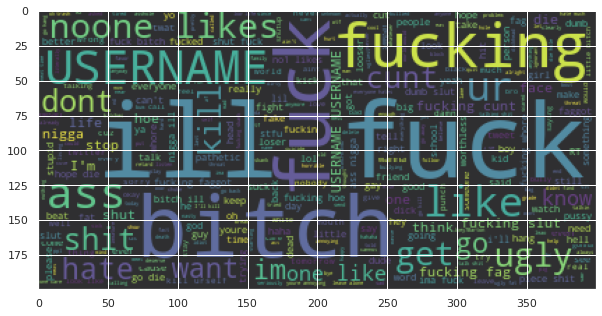

In [ ]:
text_data = train_bully.Sentence.values
wc = WordCloud(stopwords = STOPWORDS,max_words = 500)
wc.generate(" ".join(text_data))
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(colormap='viridis',random_state = 41),alpha = .80)
plt.show()

**Get Top TFIDF terms**


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf =TfidfVectorizer(ngram_range=(1, 3),max_df=0.4,sublinear_tf =True,stop_words=STOPWORDS)
plaintexts_tfidf =tf.fit_transform(train_grief['Sentence'])
feature_names = np.array(tf.get_feature_names())
# selector = SelectKBest(chi2, k=10000)
# new2=selector.fit_transform(plaintexts_tfidf, df2)

In [ ]:
print(dir(tf))
x = tf.get_feature_names()
print(len(x))
print(len(tf.idf_))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_char_ngrams', '_char_wb_ngrams', '_check_params', '_check_stop_words_consistency', '_check_vocabulary', '_count_vocab', '_get_param_names', '_get_tags', '_limit_features', '_more_tags', '_sort_features', '_stop_words_id', '_tfidf', '_validate_custom_analyzer', '_validate_params', '_validate_vocabulary', '_warn_for_unused_params', '_white_spaces', '_word_ngrams', 'analyzer', 'binary', 'build_analyzer', 'build_preprocessor', 'build_tokenizer', 'decode', 'decode_error', 'dtype', 'encoding', 'fit', 'fit_transform', 'fixed_vocabulary_', 'get_feature_names', 'get_params', 'get_stop_words', 'idf_', 'input', 'inverse_tran

In [ ]:
sort_by_tfidf = tf.idf_.argsort()
data_tfidf = [list((feature_names[i],i,tf.idf_[i])) for i in sort_by_tfidf]

In [ ]:
data_tfidf[:100]

[['and', 3445, 2.0823872837544144],
 ['am', 2113, 2.174730652556337],
 ['the', 62370, 2.296978835645411],
 ['me', 40204, 2.322621266258748],
 ['my', 42932, 2.372238218404174],
 ['is', 32358, 2.4153374108860266],
 ['not', 45888, 2.5481288848678387],
 ['myself', 44121, 2.552576631266075],
 ['it', 33531, 2.5600337873741568],
 ['you', 76367, 2.665727026375595],
 ['of', 47322, 2.72572788270762],
 ['so', 57126, 2.7435536666602203],
 ['just', 34957, 2.7435536666602203],
 ['do', 17418, 2.7764634007490185],
 ['want', 71292, 2.7876784715691585],
 ['that', 61559, 2.833840513332321],
 ['but', 11402, 2.857746034185875],
 ['want to', 71398, 2.9595287284958176],
 ['be', 8180, 2.9707521908656673],
 ['this', 65223, 2.9982138708070547],
 ['in', 31359, 3.0240672496333887],
 ['have', 27342, 3.0336367006495393],
 ['kill', 35911, 3.085436196009681],
 ['for', 22681, 3.0981752217871104],
 ['like', 37807, 3.1241507081903714],
 ['life', 37415, 3.169919126645952],
 ['if', 30527, 3.2897704153663945],
 ['die', 168

In [ ]:
sort_by_tfidf = tf.idf_.argsort()[:-1000]
data_tfidf_new = [list((feature_names[i],i,tf.idf_[i])) for i in sort_by_tfidf]

In [ ]:
data_tfidf_new

[['want', 39531, 2.7876784715691585],
 ['kill', 19616, 3.085436196009681],
 ['like', 21930, 3.1241507081903714],
 ['life', 21468, 3.169919126645952],
 ['die', 8291, 3.3054201870335223],
 ['know', 20262, 3.347294259504581],
 ['feel', 11414, 3.3505891554014338],
 ['dont', 8931, 3.422414889972689],
 ['hate', 15813, 3.480825652129104],
 ['anymore', 1130, 3.5309324721832827],
 ['suicide', 34331, 3.7077356862387902],
 ['think', 36169, 3.849386203301817],
 ['fucking', 13330, 3.865824929644977],
 ['going', 14218, 3.8995359869872885],
 ['people', 27305, 3.91682748409735],
 ['cant', 4230, 3.9226584044081427],
 ['im', 18238, 3.9463281484940476],
 ['time', 36939, 4.0273693584971735],
 ['suicidal', 34166, 4.101477330650896],
 ['hurt', 17623, 4.101477330650896],
 ['right', 29945, 4.173972832689049],
 ['better', 2611, 4.19678751045522],
 ['feel like', 11567, 4.20450955654913],
 ['day', 6988, 4.252137605538385],
 ['end', 10068, 4.285198467799273],
 ['pain', 26798, 4.363841595118386],
 ['need', 25572, 